In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import os
os.chdir('/content/drive/MyDrive/ERA_V2/Assignment10')

In [ ]:
# Import necessary modules
from network import MyNet
from data_loader import get_cifar10_dataloaders
from train_test import train, test
import torch
import torch.optim as optim
import torch.nn as nn


In [ ]:
# Initialize the network
net = MyNet()

!pip install torchsummary
from torchsummary import summary
# Initialize the network
net = MyNet()
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
net.to(device)

# Print the summary
summary(net, (3, 32, 32))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 64, 32, 32]           1,792
       BatchNorm2d-2           [-1, 64, 32, 32]             128
              ReLU-3           [-1, 64, 32, 32]               0
            Conv2d-4          [-1, 128, 32, 32]          73,856
         MaxPool2d-5          [-1, 128, 16, 16]               0
       BatchNorm2d-6          [-1, 128, 16, 16]             256
              ReLU-7          [-1, 128, 16, 16]               0
            Conv2d-8          [-1, 128, 16, 16]         147,584
       BatchNorm2d-9          [-1, 128, 16, 16]             256
             ReLU-10          [-1, 128, 16, 16]               0
           Conv2d-11          [-1, 128, 16, 16]         147,584
      BatchNorm2d-12          [-1, 128, 16, 16]             256
             ReLU-13          [-1, 128, 16, 16]               0
         ResBlock-14          [-1, 128,

In [ ]:
# Get data loaders
trainloader, testloader = get_cifar10_dataloaders()

Files already downloaded and verified
Files already downloaded and verified


In [ ]:
!pip install torch-lr-finder

  0%|          | 0/100 [00:00<?, ?it/s]

Stopping early, the loss has diverged
Learning rate search finished. See the graph with {finder_name}.plot()
LR suggestion: steepest gradient
Suggested LR: 2.31E-03


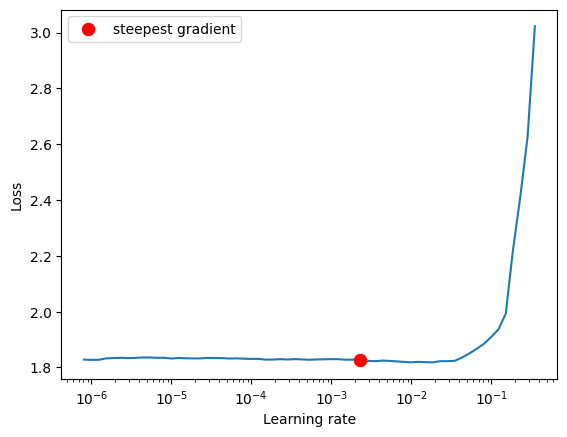

In [ ]:
criterion = nn.CrossEntropyLoss()

from torch_lr_finder import LRFinder
# Define LR finder
optimizer = optim.Adam(net.parameters(), lr=1e-7, weight_decay=1e-2)
lr_finder = LRFinder(net, optimizer, criterion, device="cuda")
lr_finder.range_test(trainloader, end_lr=100, num_iter=100,step_mode="exp")
lr_finder.plot()  # Inspect the loss-learning rate graph
lr_finder.reset()  # Reset the model and optimizer to their initial state

In [ ]:
#LRMIN and LRMAX
lr_min = 2.31e-04
lr_max = 2.31e-03

In [ ]:
# Train the model with LRMIN and LRMAX
optimizer = optim.Adam(net.parameters(), lr=lr_max, weight_decay=1e-2)
scheduler = torch.optim.lr_scheduler.OneCycleLR(optimizer, max_lr=lr_max, total_steps=len(trainloader)*24, epochs=24, steps_per_epoch=len(trainloader), pct_start=5/24, anneal_strategy='linear')
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
net.to(device)

MyNet(
  (preplayer): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
  )
  (layer1): Sequential(
    (0): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (2): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (3): ReLU(inplace=True)
  )
  (resblock1): ResBlock(
    (conv1): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (bn1): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (relu): ReLU(inplace=True)
    (conv2): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (bn2): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  )
  (layer2): Sequential(
    (0): Conv2d(128, 256, kernel_si

In [ ]:
# Train the model
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
net.to(device)
for epoch in range(24):  # loop over the dataset multiple times
    train_loss, train_accuracy = train(net, trainloader, criterion, optimizer, scheduler, device)
    print(f"Epoch {epoch+1}/{24}, Train Loss: {train_loss}, Train Accuracy: {train_accuracy}")

    # Test the model
    test_accuracy = test(net, testloader, criterion, device)
    print(f"Test Accuracy after epoch {epoch+1}: {test_accuracy}")


Epoch 1/24, Train Loss: 2.4373181669079527, Train Accuracy: 23.858
Test Accuracy after epoch 1: 36.19
Epoch 2/24, Train Loss: 1.6077074213903777, Train Accuracy: 45.712
Test Accuracy after epoch 2: 45.33
Epoch 3/24, Train Loss: 1.2458338859129925, Train Accuracy: 59.092
Test Accuracy after epoch 3: 48.74
Epoch 4/24, Train Loss: 0.8531197996772065, Train Accuracy: 70.932
Test Accuracy after epoch 4: 72.63
Epoch 5/24, Train Loss: 0.6825495404856545, Train Accuracy: 76.468
Test Accuracy after epoch 5: 70.14
Epoch 6/24, Train Loss: 0.6251476178972089, Train Accuracy: 78.436
Test Accuracy after epoch 6: 77.95
Epoch 7/24, Train Loss: 0.5752327357019696, Train Accuracy: 80.134
Test Accuracy after epoch 7: 69.65
Epoch 8/24, Train Loss: 0.51572378527145, Train Accuracy: 82.246
Test Accuracy after epoch 8: 78.22
Test Accuracy after epoch 9: 74.65
Epoch 10/24, Train Loss: 0.4327098304519848, Train Accuracy: 85.176
Test Accuracy after epoch 10: 81.39
Epoch 11/24, Train Loss: 0.3997848085602935, Tr